# Time Series Exploratory Data Analysis

In [1]:
## Install Pandas Data Reader
!pip install pandas-datareader

In [2]:
!pip install yfinance

In [3]:
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
import pandas as pd
from datetime import datetime

In [4]:
df_tesla= pdr.get_data_yahoo('TSLA')
df_tesla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-17,168.410004,174.500000,167.190002,173.860001,173.860001,125473600
2023-05-18,174.220001,177.059998,172.449997,176.889999,176.889999,109520300
2023-05-19,177.169998,181.949997,176.309998,180.139999,180.139999,136024200
2023-05-22,180.699997,189.320007,180.110001,188.869995,188.869995,132001400
2023-05-23,186.199997,192.960007,185.259995,185.770004,185.770004,156598900


In [6]:
type(df_tesla)

pandas.core.frame.DataFrame

<AxesSubplot: xlabel='Date'>

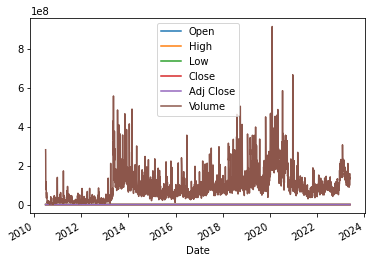

In [7]:
df_tesla.plot()

<AxesSubplot: xlabel='Date'>

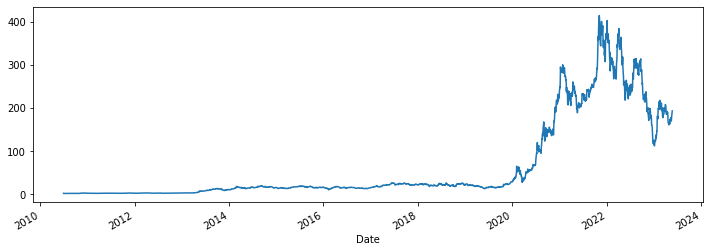

In [8]:
df_tesla["High"].plot(figsize=(12,4))

<AxesSubplot: xlabel='Date'>

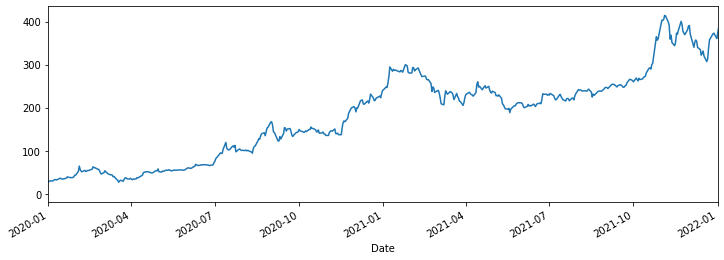

In [9]:
## Using x limit 
## We can use either list or tuple to impute the values of xlim or ylim
df_tesla["High"].plot(xlim=['2020-01-01', '2022-01-01'], figsize=(12,4))

<AxesSubplot: xlabel='Date'>

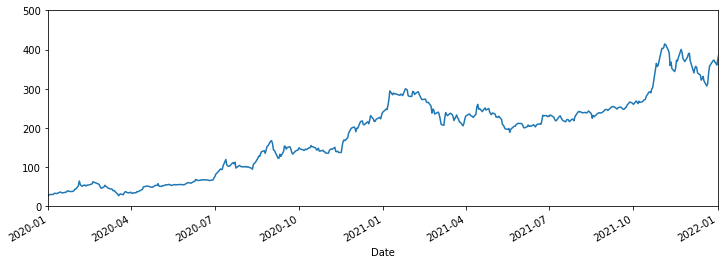

In [10]:
## Using x limit and y limit
df_tesla["High"].plot(xlim=['2020-01-01', '2022-01-01'], ylim=[0, 500],figsize=(12,4))

<AxesSubplot: xlabel='Date'>

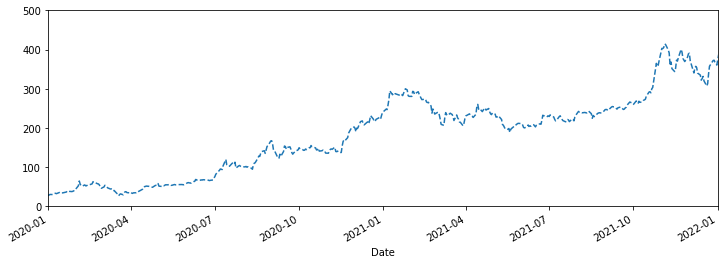

In [11]:
## Using x imit, y limit and line style
df_tesla["High"].plot(xlim= ["2020-01-01", "2022-01-01"], ylim= (0,500), figsize=(12, 4), ls="--")

<AxesSubplot: xlabel='Date'>

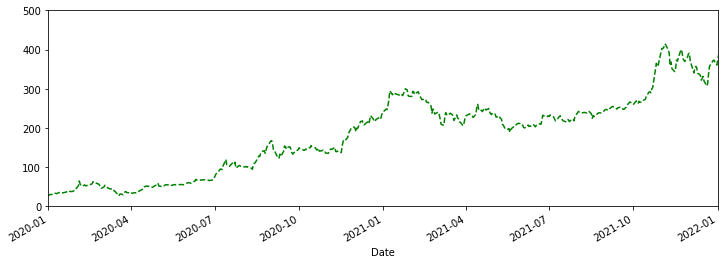

In [12]:
## Using x imit, y limit, line style and coloring (c or color both can be used)
df_tesla["High"].plot(xlim= ("2020-01-01", "2022-01-01"), ylim= (0,500), figsize=(12,4), ls="--", color= "green")

In [13]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-15',
               '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19',
               '2023-05-22', '2023-05-23'],
              dtype='datetime64[ns]', name='Date', length=3248, freq=None)

In [14]:
df_tesla_index= df_tesla.loc["2020-01-01":"2022-01-01"].index
df_tesla_index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [15]:
share_open= df_tesla.loc["2020-01-01":"2022-01-01"]["Open"]
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-12-27    357.890015
2021-12-28    369.829987
2021-12-29    366.213318
2021-12-30    353.776672
2021-12-31    357.813324
Name: Open, Length: 505, dtype: float64

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

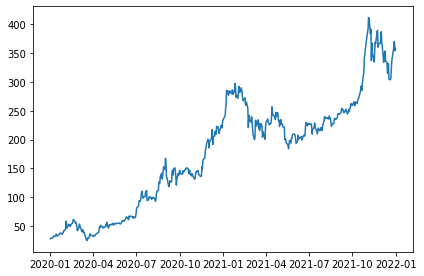

In [18]:
figure, axis= plt.subplots()
plt.tight_layout()
axis.plot(df_tesla_index, share_open)

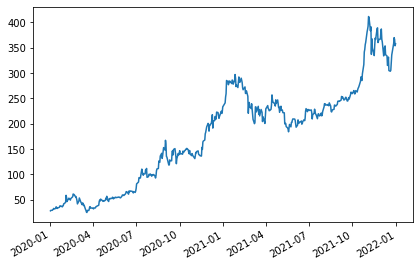

In [20]:
figure, axis= plt.subplots()
plt.tight_layout()
## preventing overlapping at x axis
figure.autofmt_xdate()
axis.plot(df_tesla_index, share_open)

In [21]:
## Datetime Index

In [22]:
df_tesla= df_tesla.reset_index()

In [24]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3248 non-null   datetime64[ns]
 1   Open       3248 non-null   float64       
 2   High       3248 non-null   float64       
 3   Low        3248 non-null   float64       
 4   Close      3248 non-null   float64       
 5   Adj Close  3248 non-null   float64       
 6   Volume     3248 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 177.8 KB


In [26]:
df_tesla= df_tesla.set_index("Date", drop=True)

In [27]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [28]:
## datetime

In [29]:
from datetime import datetime

In [31]:
datetime(2023,5,21)

datetime.datetime(2023, 5, 21, 0, 0)

In [32]:
datetime.now()

datetime.datetime(2023, 5, 24, 11, 15, 57, 22436)

In [33]:
date= datetime(2023,5,21)

In [34]:
date

datetime.datetime(2023, 5, 21, 0, 0)

In [35]:
date.date()

datetime.date(2023, 5, 21)

In [37]:
date.day

21

In [38]:
date.weekday()

6

In [39]:
date.month

5

In [40]:
date.year

2023

## Time Resampling

In [41]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [42]:
# Fetching minimum value for all columns throughout the year
# Rule A means year end frequency.
df_tesla.resample(rule="A").min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


In [43]:
df_tesla.resample(rule="A").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


<AxesSubplot: xlabel='Date'>

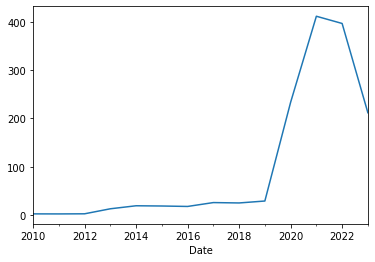

In [44]:
df_tesla.resample(rule="A").max()["Open"].plot()

In [45]:
## Rule QS means quarterly start frequency.
df_tesla.resample(rule= "QS").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028000,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728000,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428000,2.316667,2.364667,2.364667,139528500
2011-01-01,1.906000,1.914000,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100000,1.970000,2.009333,2.009333,93138000
2011-07-01,1.992667,2.029333,1.934000,1.982000,1.982000,45967500
2011-10-01,2.308667,2.333333,2.268667,2.329333,2.329333,58024500
2012-01-01,2.546000,2.663333,2.474000,2.529333,2.529333,82506000
2012-04-01,2.488667,2.564667,2.444667,2.534000,2.534000,83344500


<AxesSubplot: xlabel='Date'>

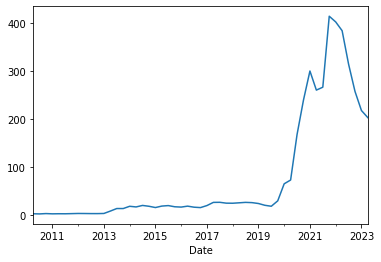

In [46]:
df_tesla.resample(rule= "QS").max()["High"].plot()

In [47]:
## Rule QS means business end frequency.
df_tesla.resample(rule= "BA").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


<AxesSubplot: xlabel='Date'>

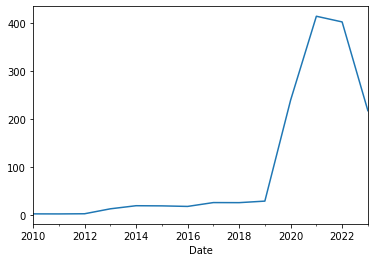

In [48]:
df_tesla.resample(rule= "BA").max()["High"].plot()

In [49]:
## Rule BQS means business quarters frequency.
df_tesla.resample(rule= "BQS").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028000,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728000,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428000,2.316667,2.364667,2.364667,139528500
2011-01-03,1.906000,1.914000,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100000,1.970000,2.009333,2.009333,93138000
2011-07-01,1.992667,2.029333,1.934000,1.982000,1.982000,45967500
2011-10-03,2.308667,2.333333,2.268667,2.329333,2.329333,58024500
2012-01-02,2.546000,2.663333,2.474000,2.529333,2.529333,82506000
2012-04-02,2.488667,2.564667,2.444667,2.534000,2.534000,83344500


<AxesSubplot: xlabel='Date'>

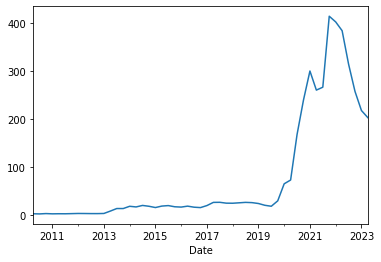

In [50]:
df_tesla.resample(rule= "BQS").max()["High"].plot()

<AxesSubplot: xlabel='Date'>

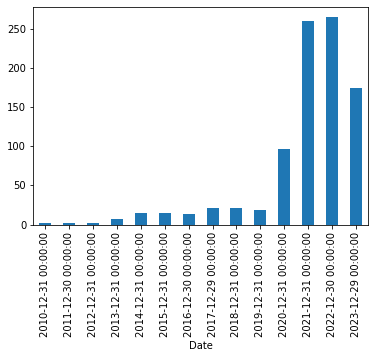

In [52]:
## Plotting
df_tesla["Open"].resample(rule= "BA").mean().plot(kind="bar")

In [53]:
## Rule M means for every month
df_tesla["Open"].resample(rule="M").mean()

Date
2010-06-30      1.493000
2010-07-31      1.338222
2010-08-31      1.303030
2010-09-30      1.385270
2010-10-31      1.381556
                 ...    
2023-01-31    132.316000
2023-02-28    198.178420
2023-03-31    188.425218
2023-04-30    177.734212
2023-05-31    170.102353
Freq: M, Name: Open, Length: 156, dtype: float64

In [54]:
df_tesla["Open"].resample(rule="M").max()

Date
2010-06-30      1.719333
2010-07-31      1.666667
2010-08-31      1.463333
2010-09-30      1.476667
2010-10-31      1.426000
                 ...    
2023-01-31    178.050003
2023-02-28    211.759995
2023-03-31    206.210007
2023-04-30    199.910004
2023-05-31    186.199997
Freq: M, Name: Open, Length: 156, dtype: float64

<AxesSubplot: xlabel='Date'>

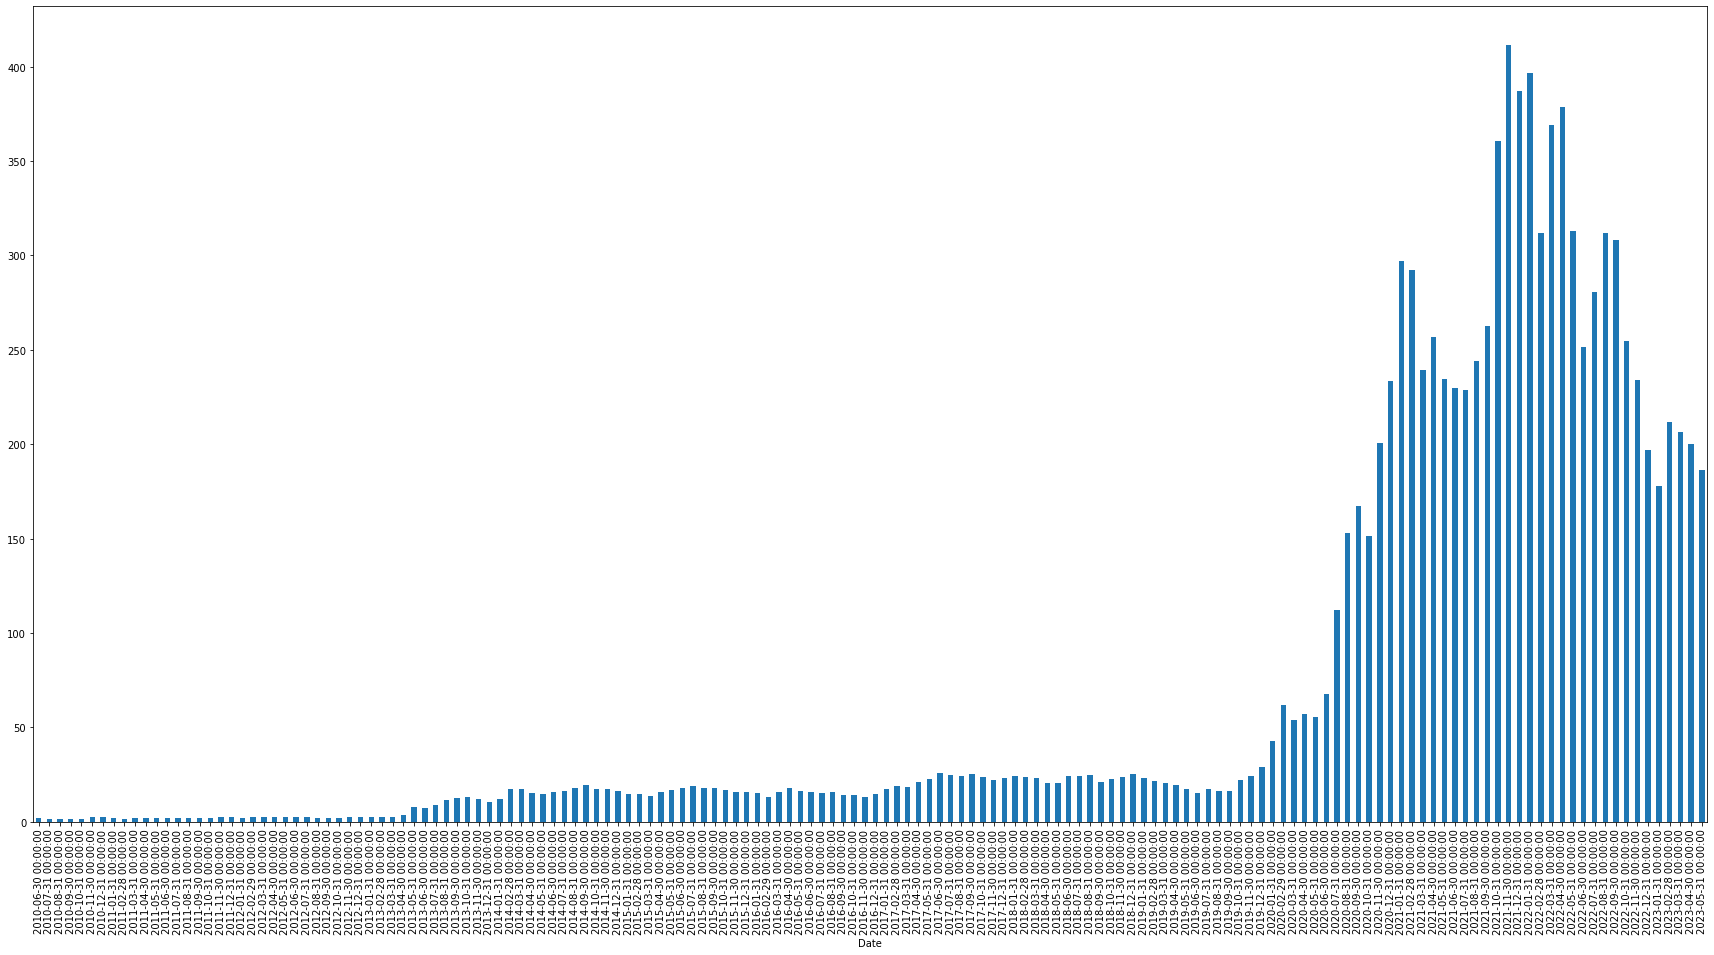

In [68]:
df_tesla["Open"].resample(rule="M").max().plot(kind="bar", figsize=(30,15))

## Rolling

In [69]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [70]:
df_tesla["High"].head()

Date
2010-06-29    1.666667
2010-06-30    2.028000
2010-07-01    1.728000
2010-07-02    1.540000
2010-07-06    1.333333
Name: High, dtype: float64

In [74]:
df_tesla["High"].rolling(10).mean().head(20)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13    1.421333
2010-07-14    1.389000
2010-07-15    1.329533
2010-07-16    1.298733
2010-07-19    1.293067
2010-07-20    1.305400
2010-07-21    1.333867
2010-07-22    1.358733
2010-07-23    1.383133
2010-07-26    1.406000
2010-07-27    1.422933
Name: High, dtype: float64

In [75]:
df_tesla["High"].rolling(10).max().head(20)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13    2.028000
2010-07-14    2.028000
2010-07-15    1.728000
2010-07-16    1.540000
2010-07-19    1.483333
2010-07-20    1.483333
2010-07-21    1.483333
2010-07-22    1.483333
2010-07-23    1.483333
2010-07-26    1.483333
2010-07-27    1.483333
Name: High, dtype: float64

In [76]:
df_tesla["Open:30 days rolling"]= df_tesla["Open"].rolling(30).mean()

In [78]:
df_tesla.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,NaN
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,NaN
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,NaN
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,NaN


<AxesSubplot: xlabel='Date'>

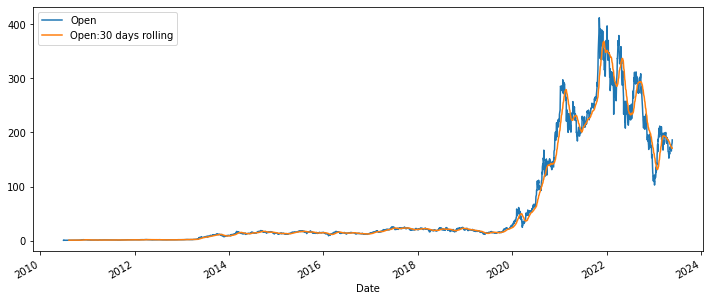

In [80]:
df_tesla[["Open", "Open:30 days rolling"]].plot(figsize=(12,5))

## Assignment
### news
1. Read the Microsoft Data using Pandas Data reader
2. Get the maximum price of the share from 2017 to 2022
3. Which is the date of the highest price of the stock?
4. Which is the date of the lowest price of the stock?